In [62]:
!pip install rdkit_pypi

In [63]:
import numpy as np
import pandas as pd
import seaborn as sns

from collections import defaultdict
from rdkit import Chem
from rdkit.Chem import Crippen, Descriptors, GraphDescriptors, Lipinski, QED, rdMolDescriptors
from rdkit.Chem.MolStandardize import rdMolStandardize

In [64]:
df = pd.read_csv('regression_dataset.csv')
df.head()

,SMILES,CASRN,EXTERNALID,N,NAME,ARTICLEID,PUBMEDID,PAGE,TABLE,logBB,UNIT {logBB},"logBB {measured, converted}",UNIT {logBB}.1,Tissue,Dataset,Species,VOC,Drug_Class,DataSetName,comment (chemical)
0,O=C1N2CCCC(O)C2=NC(C)=C1CCN3CCC(C4=NOC5=C4C=CC...,-,-,24,9-OH Risperidone,A23,10554091,1515,1,-0.67,Log unit,-1.543,ln unit,Blood,NaN,NaN,NaN,NaN,NaN,NaN
1,CN1CC2C3=CC=CC(C)=C3OC4=CC=CC=C4C2(CC1)O,-,-,5,Beloxepin (Org4428),A23,10554091,1515,1,0.82,Log unit,1.888,ln unit,Blood,NaN,NaN,NaN,NaN,NaN,NaN
2,NC(N1C2=C(C=CC3=C1C=CC=C3)C=CC=C2)=O,-,-,14,carbamazepine,A23,10554091,1515,1,0.00,Log unit,0.000,ln unit,Blood,NaN,NaN,NaN,NaN,NaN,NaN
3,ClC1=CC=C2N(C(NC2=C1)=O)C3CCN(CC3)CCCN4C(NC5=C...,-,-,21,domperidone,A23,10554091,1515,1,-0.78,Log unit,-1.796,ln unit,Blood,NaN,NaN,NaN,NaN,NaN,NaN
4,CN1CCN2C(C3=CC=CC=C3CC4=CC=CC=C24)C1,-,-,3,Mianserin,A23,10554091,1515,1,0.99,Log unit,2.280,ln unit,Blood,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5506 entries, 0 to 5505
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SMILES                       5506 non-null   object 
 1   CASRN                        5506 non-null   object 
 2   EXTERNALID                   5506 non-null   object 
 3   N                            5458 non-null   object 
 4   NAME                         5506 non-null   object 
 5   ARTICLEID                    5506 non-null   object 
 6   PUBMEDID                     5506 non-null   object 
 7   PAGE                         5506 non-null   object 
 8   TABLE                        5166 non-null   object 
 9   logBB                        5506 non-null   float64
 10  UNIT {logBB}                 5506 non-null   object 
 11  logBB {measured, converted}  5506 non-null   float64
 12  UNIT {logBB}.1               5506 non-null   object 
 13  Tissue            

In [66]:
used_mols = []
for i, row in df.iterrows():
  try:
    df.at[i, 'SMILES'] = Chem.CanonSmiles(row.SMILES)
  except:
    if row.SMILES not in used_mols:
      used_mols.append(row.SMILES)
    df = df.drop(labels=[i], axis=0)
df.shape

[17:07:51] Explicit valence for atom # 1 N, 4, is greater than permitted
[17:07:51] Explicit valence for atom # 1 N, 4, is greater than permitted
[17:07:51] Explicit valence for atom # 1 N, 4, is greater than permitted
[17:07:51] Explicit valence for atom # 1 N, 4, is greater than permitted
[17:07:52] Explicit valence for atom # 1 N, 4, is greater than permitted
[17:07:52] Explicit valence for atom # 1 N, 4, is greater than permitted
[17:07:52] Explicit valence for atom # 1 N, 4, is greater than permitted
[17:07:52] Explicit valence for atom # 1 N, 4, is greater than permitted
[17:07:52] Explicit valence for atom # 1 N, 4, is greater than permitted
[17:07:53] Explicit valence for atom # 1 N, 4, is greater than permitted
[17:07:53] Explicit valence for atom # 1 N, 4, is greater than permitted
[17:07:53] non-ring atom 8 marked aromatic
[17:07:54] Explicit valence for atom # 5 N, 4, is greater than permitted
[17:07:54] Can't kekulize mol.  Unkekulized atoms: 2 3 4 5 6
[17:07:54] Can't kek

(5485, 20)

In [67]:
df.reset_index(drop=True, inplace=True)

In [68]:
df.head()

,SMILES,CASRN,EXTERNALID,N,NAME,ARTICLEID,PUBMEDID,PAGE,TABLE,logBB,UNIT {logBB},"logBB {measured, converted}",UNIT {logBB}.1,Tissue,Dataset,Species,VOC,Drug_Class,DataSetName,comment (chemical)
0,Cc1nc2n(c(=O)c1CCN1CCC(c3noc4cc(F)ccc34)CC1)CC...,-,-,24,9-OH Risperidone,A23,10554091,1515,1,-0.67,Log unit,-1.543,ln unit,Blood,NaN,NaN,NaN,NaN,NaN,NaN
1,Cc1cccc2c1Oc1ccccc1C1(O)CCN(C)CC21,-,-,5,Beloxepin (Org4428),A23,10554091,1515,1,0.82,Log unit,1.888,ln unit,Blood,NaN,NaN,NaN,NaN,NaN,NaN
2,NC(=O)N1c2ccccc2C=Cc2ccccc21,-,-,14,carbamazepine,A23,10554091,1515,1,0.00,Log unit,0.000,ln unit,Blood,NaN,NaN,NaN,NaN,NaN,NaN
3,O=c1[nH]c2ccccc2n1CCCN1CCC(n2c(=O)[nH]c3cc(Cl)...,-,-,21,domperidone,A23,10554091,1515,1,-0.78,Log unit,-1.796,ln unit,Blood,NaN,NaN,NaN,NaN,NaN,NaN
4,CN1CCN2c3ccccc3Cc3ccccc3C2C1,-,-,3,Mianserin,A23,10554091,1515,1,0.99,Log unit,2.280,ln unit,Blood,NaN,NaN,NaN,NaN,NaN,NaN


In [69]:
un = rdMolStandardize.Uncharger()

In [70]:
df['Agglomeration'] = df['SMILES'].apply(lambda x: '.' in x)
df['SMILES_clear'] = df['SMILES'].apply(lambda x: max(x.split('.'), key=len)) # из комплексов (например, гидратов) убираем молекулы воды
df['ROMol'] = df['SMILES_clear'].apply(lambda x: Chem.MolFromSmiles(x))
df.shape

(5485, 23)

In [71]:
df = df[~df['ROMol'].isna()]
df.shape

(5485, 23)

In [72]:
df['SMILES_uncharge'] = df['ROMol'].apply(lambda x: Chem.MolToSmiles(un.uncharge(x), kekuleSmiles=True))

Выходные данные были обрезаны до нескольких последних строк (5000).
[17:07:57] Running Uncharger
[17:07:57] Running Uncharger
[17:07:57] Running Uncharger
[17:07:57] Running Uncharger
[17:07:57] Running Uncharger
[17:07:57] Running Uncharger
[17:07:57] Running Uncharger
[17:07:57] Running Uncharger
[17:07:57] Running Uncharger
[17:07:57] Running Uncharger
[17:07:57] Running Uncharger
[17:07:57] Running Uncharger
[17:07:57] Running Uncharger
[17:07:57] Running Uncharger
[17:07:57] Running Uncharger
[17:07:57] Running Uncharger
[17:07:57] Running Uncharger
[17:07:57] Running Uncharger
[17:07:57] Running Uncharger
[17:07:57] Running Uncharger
[17:07:57] Running Uncharger
[17:07:57] Running Uncharger
[17:07:57] Running Uncharger
[17:07:57] Running Uncharger
[17:07:57] Running Uncharger
[17:07:57] Running Uncharger
[17:07:57] Running Uncharger
[17:07:57] Running Uncharger
[17:07:57] Running Uncharger
[17:07:57] Running Uncharger
[17:07:57] Running Uncharger
[17:07:57] Running Uncharger
[17:

In [73]:
df.drop(labels=['SMILES_clear', 'ROMol', 'Agglomeration', 'SMILES'], inplace=True, axis=1)

In [74]:
sm = df['SMILES_uncharge'].values
index_sm = df.index.tolist()

In [75]:
list_inorg_el = ['Al', 'Au', 'Ar,''Ba', 'Be', 'Bi', 'Ca','Cd', 'Co','Cr','Cu','Fe', 'Gd','Ge', 'Hf',
                 'Hg', 'In', 'K', 'Kr' 'La', 'Mg', 'Mn', 'Na', 'Ni', 'Pb', 'Pt', 'Sb', 'Sn','Sr','Te',
                 'V','Zn', 'Li', 'Xe', 'Rn', 'Ne']
index_drop = []
uniq_el = set([])
for sm_i in range(len(sm)):
    mol_sm = Chem.MolFromSmiles(sm[sm_i])
    list_at = [str(x.GetSymbol()) for x in mol_sm.GetAtoms()]
    intersec = list(set(list_at) & set(list_inorg_el))
    T_C = 'C' in list_at
    if T_C == False:
        index_drop.append(index_sm[sm_i])
        print('smiles', sm[sm_i])
    elif len(intersec) > 0 or sm[sm_i] == 'O=C=O' or sm[sm_i] == '[C-]#[O+]': # убираем CO2 или CO
        index_drop.append(index_sm[sm_i])
        print('intersection', intersec)
    uniq_el = uniq_el | set(list_at)

smiles [Rn]
smiles O
smiles [Ar]
smiles [Kr]
smiles [Ne]
smiles [Rn]
smiles [Xe]
smiles [N][N]
smiles FS(F)(F)(F)(F)F
smiles O
smiles N#N
smiles FS(F)(F)(F)(F)F
smiles FS(F)(F)(F)(F)F
smiles N#N
smiles N#N
smiles FS(F)(F)(F)(F)F
smiles [Ar]
smiles [Kr]
smiles [Ne]
smiles N#N
smiles FS(F)(F)(F)(F)F
smiles [Xe]
smiles [N][N]
smiles FS(F)(F)(F)(F)F
smiles O
smiles N#N
smiles N#N
smiles FS(F)(F)(F)(F)F
smiles FS(F)(F)(F)(F)F
smiles [Xe]
smiles [Kr]
smiles [Ne]
smiles N#N
smiles [Ar]
smiles O
smiles [N][N]
smiles FS(F)(F)(F)(F)F
smiles N#N
intersection ['Na']
smiles FS(F)(F)(F)(F)F
smiles [Ne]
smiles [Ar]
smiles [Kr]
smiles [Xe]
smiles N#N
smiles FS(F)(F)(F)(F)F
smiles FS(F)(F)(F)(F)F
smiles N#N
smiles O
smiles [N-]=[N+]=O
smiles FS(F)(F)(F)(F)F
smiles N#N
smiles N#N
smiles N#[N+][O-]
smiles O
smiles [Kr]
smiles FS(F)(F)(F)(F)F
smiles [Ne]
smiles [Ar]
smiles [Xe]
smiles [Rn]
smiles N#[N+][O-]
smiles FS(F)(F)(F)(F)F


In [76]:
len(index_drop)

63

In [77]:
df.drop(index=index_drop, inplace=True)

In [78]:
df.head()

,CASRN,EXTERNALID,N,NAME,ARTICLEID,PUBMEDID,PAGE,TABLE,logBB,UNIT {logBB},"logBB {measured, converted}",UNIT {logBB}.1,Tissue,Dataset,Species,VOC,Drug_Class,DataSetName,comment (chemical),SMILES_uncharge
0,-,-,24,9-OH Risperidone,A23,10554091,1515,1,-0.67,Log unit,-1.543,ln unit,Blood,NaN,NaN,NaN,NaN,NaN,NaN,CC1=C(CCN2CCC(C3=NOC4=CC(F)=CC=C34)CC2)C(=O)N2...
1,-,-,5,Beloxepin (Org4428),A23,10554091,1515,1,0.82,Log unit,1.888,ln unit,Blood,NaN,NaN,NaN,NaN,NaN,NaN,CC1=CC=CC2=C1OC1=CC=CC=C1C1(O)CCN(C)CC21
2,-,-,14,carbamazepine,A23,10554091,1515,1,0.00,Log unit,0.000,ln unit,Blood,NaN,NaN,NaN,NaN,NaN,NaN,NC(=O)N1C2=CC=CC=C2C=CC2=CC=CC=C21
3,-,-,21,domperidone,A23,10554091,1515,1,-0.78,Log unit,-1.796,ln unit,Blood,NaN,NaN,NaN,NaN,NaN,NaN,O=C1NC2=CC=CC=C2N1CCCN1CCC(N2C(=O)NC3=CC(Cl)=C...
4,-,-,3,Mianserin,A23,10554091,1515,1,0.99,Log unit,2.280,ln unit,Blood,NaN,NaN,NaN,NaN,NaN,NaN,CN1CCN2C3=CC=CC=C3CC3=CC=CC=C3C2C1


In [79]:
def default_value():
  return []

In [80]:
smiles_dict = defaultdict(default_value)

In [81]:
for i, row in df.iterrows():
    smiles_dict[row.SMILES_uncharge].append(row.logBB)


In [82]:
len(smiles_dict.keys())

733

In [83]:
for smi in smiles_dict.keys():
  smiles_dict[smi] = round(np.mean(smiles_dict[smi]), 2)
smiles_dict['C#CCN(C)C(C)CC1=CC=CC=C1']

0.57

In [84]:
for i, row in df.iterrows():
    df.at[i, 'logBB'] = smiles_dict[row.SMILES_uncharge]
df.head()

,CASRN,EXTERNALID,N,NAME,ARTICLEID,PUBMEDID,PAGE,TABLE,logBB,UNIT {logBB},"logBB {measured, converted}",UNIT {logBB}.1,Tissue,Dataset,Species,VOC,Drug_Class,DataSetName,comment (chemical),SMILES_uncharge
0,-,-,24,9-OH Risperidone,A23,10554091,1515,1,-0.67,Log unit,-1.543,ln unit,Blood,NaN,NaN,NaN,NaN,NaN,NaN,CC1=C(CCN2CCC(C3=NOC4=CC(F)=CC=C34)CC2)C(=O)N2...
1,-,-,5,Beloxepin (Org4428),A23,10554091,1515,1,0.82,Log unit,1.888,ln unit,Blood,NaN,NaN,NaN,NaN,NaN,NaN,CC1=CC=CC2=C1OC1=CC=CC=C1C1(O)CCN(C)CC21
2,-,-,14,carbamazepine,A23,10554091,1515,1,-0.04,Log unit,0.000,ln unit,Blood,NaN,NaN,NaN,NaN,NaN,NaN,NC(=O)N1C2=CC=CC=C2C=CC2=CC=CC=C21
3,-,-,21,domperidone,A23,10554091,1515,1,-0.84,Log unit,-1.796,ln unit,Blood,NaN,NaN,NaN,NaN,NaN,NaN,O=C1NC2=CC=CC=C2N1CCCN1CCC(N2C(=O)NC3=CC(Cl)=C...
4,-,-,3,Mianserin,A23,10554091,1515,1,0.99,Log unit,2.280,ln unit,Blood,NaN,NaN,NaN,NaN,NaN,NaN,CN1CCN2C3=CC=CC=C3CC3=CC=CC=C3C2C1


In [85]:
df.drop_duplicates(subset=['SMILES_uncharge'], inplace=True)
df.shape

(733, 20)

In [86]:
sns.set_theme()

<Axes: xlabel='logBB'>

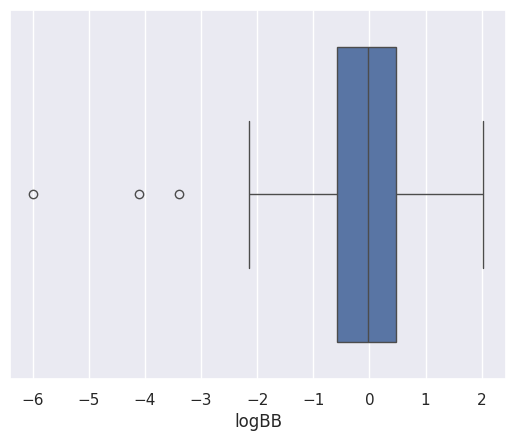

In [87]:
sns.boxplot(x=df['logBB'])

In [88]:
mean_logBB = df['logBB'].mean()
mean_logBB

-0.07862210095497955

In [89]:
std_logBB = df['logBB'].std()
std_logBB

0.8186902343947887

In [90]:
df['logBB'].value_counts()

 0.00    17
-0.28    11
 0.30    10
-1.00    10
-1.30    10
         ..
 0.14     1
-0.25     1
-1.69     1
 0.87     1
-6.00     1
Name: logBB, Length: 251, dtype: int64

<Axes: xlabel='logBB', ylabel='Count'>

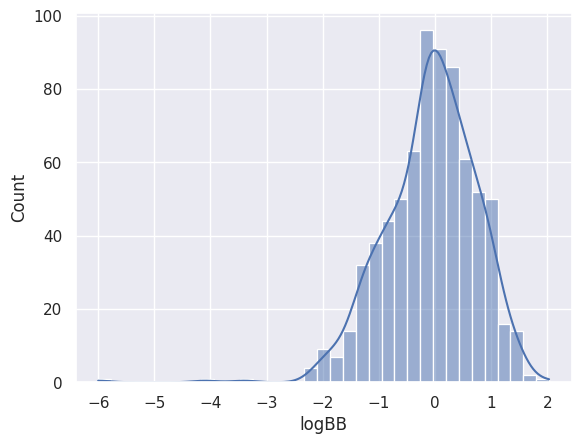

In [91]:
sns.histplot(x=df['logBB'], kde=True)

In [92]:
mean_logBB + 2 * std_logBB

1.558758367834598

In [93]:
mean_logBB - 2 * std_logBB

-1.716002569744557

In [94]:
df = df[(df['logBB'] < (mean_logBB + 2 * std_logBB)) & (df['logBB'] > (mean_logBB - 2 * std_logBB))]
df.shape

(712, 20)

###**Модули QED и Crippen**

<Axes: >

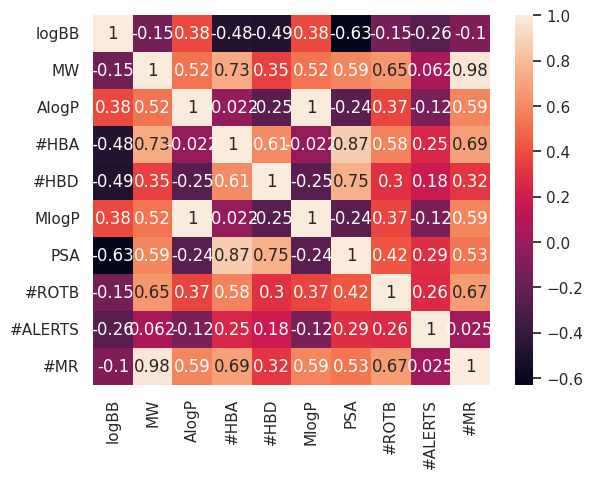

In [95]:
for i, row in df.iterrows():
    mol = Chem.MolFromSmiles(row.SMILES_uncharge)
    qed_vector = QED.properties(mol)
    df.at[i, 'MW'] = round(qed_vector[0], 2)
    df.at[i, 'AlogP'] = round(qed_vector[1], 2)
    df.at[i, '#HBA'] = qed_vector[2]
    df.at[i, '#HBD'] = qed_vector[3]
    df.at[i, 'PSA'] = qed_vector[4]
    df.at[i, '#ROTB'] = qed_vector[5]
    df.at[i, '#ALERTS'] = qed_vector[7]

    df.at[i, 'MlogP'] = round(Crippen.MolLogP(mol), 2)
    df.at[i, '#MR'] = round(Crippen.MolMR(mol), 2)

df_to_heatmap = df[['logBB', 'MW', 'AlogP', '#HBA', '#HBD', 'MlogP', 'PSA', '#ROTB', '#ALERTS', '#MR']]
sns.heatmap(df_to_heatmap.corr(), annot=True)

### **Модуль Lipinski**

<Axes: >

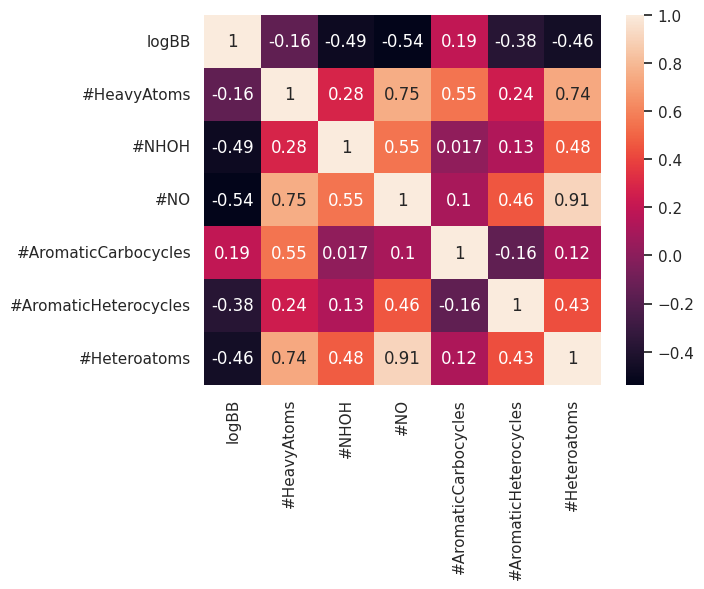

In [96]:
for i, row in df.iterrows():
    mol = Chem.MolFromSmiles(row.SMILES_uncharge)
    df.at[i, '#HeavyAtoms'] = Lipinski.HeavyAtomCount(mol)
    df.at[i, '#NHOH'] = Lipinski.NHOHCount(mol)
    df.at[i, '#NO'] = Lipinski.NOCount(mol)
    df.at[i, '#AromaticCarbocycles'] = Lipinski.NumAromaticCarbocycles(mol)
    df.at[i, '#AromaticHeterocycles'] = Lipinski.NumAromaticHeterocycles(mol)
    df.at[i, '#Heteroatoms'] = Lipinski.NumHeteroatoms(mol)

df_to_heatmap = df[['logBB', '#HeavyAtoms', '#NHOH', '#NO', '#AromaticCarbocycles', '#AromaticHeterocycles', '#Heteroatoms']]
sns.heatmap(df_to_heatmap.corr(), annot=True)

### **Модуль Descriptors**

<Axes: >

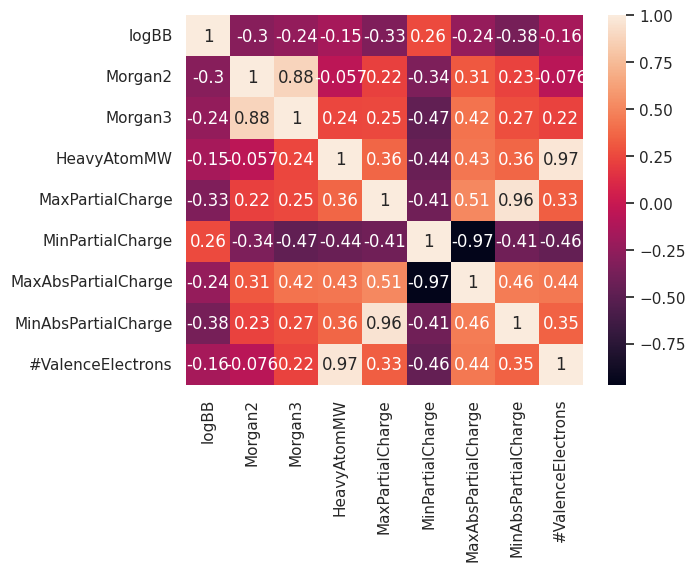

In [97]:
for i, row in df.iterrows():
    mol = Chem.MolFromSmiles(row.SMILES_uncharge)
    df.at[i, 'Morgan2'] =  round(Descriptors.FpDensityMorgan2(mol), 2)
    df.at[i, 'Morgan3'] =  round(Descriptors.FpDensityMorgan3(mol), 2)
    df.at[i, 'HeavyAtomMW'] =  round(Descriptors.HeavyAtomMolWt(mol), 2)
    df.at[i, 'MaxPartialCharge'] = round(Descriptors.MaxPartialCharge(mol), 2)
    df.at[i, 'MinPartialCharge'] = round(Descriptors.MinPartialCharge(mol), 2)
    df.at[i, 'MaxAbsPartialCharge'] = round(Descriptors.MaxAbsPartialCharge(mol), 2)
    df.at[i, 'MinAbsPartialCharge'] = round(Descriptors.MinAbsPartialCharge(mol), 2)
    df.at[i, '#ValenceElectrons'] = Descriptors.NumValenceElectrons(mol)
df_to_heatmap = df[['logBB', 'Morgan2', 'Morgan3', 'HeavyAtomMW', 'MaxPartialCharge', 'MinPartialCharge',
                    'MaxAbsPartialCharge', 'MinAbsPartialCharge', '#ValenceElectrons']]
sns.heatmap(df_to_heatmap.corr(), annot=True)

### **Модуль GraphDescriptors**

<Axes: >

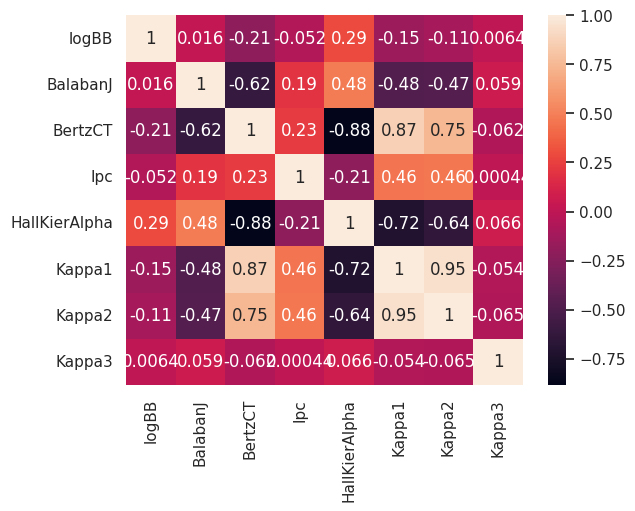

In [98]:
for i, row in df.iterrows():
    mol = Chem.MolFromSmiles(row.SMILES_uncharge)
    df.at[i, 'BalabanJ'] = round(GraphDescriptors.BalabanJ(mol), 2)
    df.at[i, 'BertzCT'] = round(GraphDescriptors.BertzCT(mol), 2)
    df.at[i, 'Ipc'] = round(GraphDescriptors.Ipc(mol), 2)
    df.at[i, 'HallKierAlpha'] = round(GraphDescriptors.HallKierAlpha(mol), 2)
    df.at[i, 'Kappa1'] = round(GraphDescriptors.Kappa1(mol), 2)
    df.at[i, 'Kappa2'] = round(GraphDescriptors.Kappa2(mol), 2)
    df.at[i, 'Kappa3'] = round(GraphDescriptors.Kappa3(mol), 2)
df_to_heatmap = df[['logBB', 'BalabanJ', 'BertzCT', 'Ipc', 'HallKierAlpha', 'Kappa1', 'Kappa2', 'Kappa3']]
sns.heatmap(df_to_heatmap.corr(), annot=True)

# **Final preprocessing**

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 5463
Data columns (total 50 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CASRN                        712 non-null    object 
 1   EXTERNALID                   712 non-null    object 
 2   N                            689 non-null    object 
 3   NAME                         712 non-null    object 
 4   ARTICLEID                    712 non-null    object 
 5   PUBMEDID                     712 non-null    object 
 6   PAGE                         712 non-null    object 
 7   TABLE                        597 non-null    object 
 8   logBB                        712 non-null    float64
 9   UNIT {logBB}                 712 non-null    object 
 10  logBB {measured, converted}  712 non-null    float64
 11  UNIT {logBB}.1               712 non-null    object 
 12  Tissue                       257 non-null    object 
 13  Dataset            

In [100]:
df.reset_index(drop=True, inplace=True) # обновляем индексы строк

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 50 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CASRN                        712 non-null    object 
 1   EXTERNALID                   712 non-null    object 
 2   N                            689 non-null    object 
 3   NAME                         712 non-null    object 
 4   ARTICLEID                    712 non-null    object 
 5   PUBMEDID                     712 non-null    object 
 6   PAGE                         712 non-null    object 
 7   TABLE                        597 non-null    object 
 8   logBB                        712 non-null    float64
 9   UNIT {logBB}                 712 non-null    object 
 10  logBB {measured, converted}  712 non-null    float64
 11  UNIT {logBB}.1               712 non-null    object 
 12  Tissue                       257 non-null    object 
 13  Dataset             

In [102]:
df.columns

Index(['CASRN', 'EXTERNALID', 'N', 'NAME', 'ARTICLEID', 'PUBMEDID', 'PAGE',
       'TABLE', 'logBB', 'UNIT {logBB}', 'logBB {measured, converted}',
       'UNIT {logBB}.1', 'Tissue', 'Dataset', 'Species', 'VOC', 'Drug_Class',
       'DataSetName', 'comment (chemical)', 'SMILES_uncharge', 'MW', 'AlogP',
       '#HBA', '#HBD', 'PSA', '#ROTB', '#ALERTS', 'MlogP', '#MR',
       '#HeavyAtoms', '#NHOH', '#NO', '#AromaticCarbocycles',
       '#AromaticHeterocycles', '#Heteroatoms', 'Morgan2', 'Morgan3',
       'HeavyAtomMW', 'MaxPartialCharge', 'MinPartialCharge',
       'MaxAbsPartialCharge', 'MinAbsPartialCharge', '#ValenceElectrons',
       'BalabanJ', 'BertzCT', 'Ipc', 'HallKierAlpha', 'Kappa1', 'Kappa2',
       'Kappa3'],
      dtype='object')

In [103]:
cols_to_del = ['CASRN', 'EXTERNALID', 'N', 'NAME',  'ARTICLEID', 'PUBMEDID',
               'PAGE', 'TABLE', 'logBB {measured, converted}', 'UNIT {logBB}',
               'UNIT {logBB}.1', 'Tissue', 'Dataset', 'Species', 'VOC', 'Drug_Class',
               'DataSetName', 'comment (chemical)']
df.drop(labels=cols_to_del, axis=1, inplace=True)

In [104]:
df.head()

,logBB,SMILES_uncharge,MW,AlogP,#HBA,#HBD,PSA,#ROTB,#ALERTS,MlogP,...,MaxAbsPartialCharge,MinAbsPartialCharge,#ValenceElectrons,BalabanJ,BertzCT,Ipc,HallKierAlpha,Kappa1,Kappa2,Kappa3
0,-0.67,CC1=C(CCN2CCC(C3=NOC4=CC(F)=CC=C34)CC2)C(=O)N2...,426.49,3.08,6.0,1.0,84.39,4.0,0.0,3.08,...,0.39,0.26,164.0,1.24,1163.57,18087426.53,-2.58,20.33,8.16,3.78
1,0.82,CC1=CC=CC2=C1OC1=CC=CC=C1C1(O)CCN(C)CC21,295.38,3.41,3.0,1.0,32.70,0.0,0.0,3.41,...,0.46,0.13,114.0,2.00,727.13,152461.48,-1.84,13.80,4.83,1.89
2,-0.04,NC(=O)N1C2=CC=CC=C2C=CC2=CC=CC=C21,236.27,3.39,1.0,1.0,46.33,0.0,0.0,3.39,...,0.35,0.32,88.0,2.31,596.95,20630.43,-2.55,10.59,4.04,1.57
3,-0.84,O=C1NC2=CC=CC=C2N1CCCN1CCC(N2C(=O)NC3=CC(Cl)=C...,425.92,3.35,3.0,2.0,78.82,5.0,0.0,3.35,...,0.33,0.31,156.0,1.21,1306.55,12343200.70,-2.77,19.21,7.81,3.48
4,0.99,CN1CCN2C3=CC=CC=C3CC3=CC=CC=C3C2C1,264.37,3.08,2.0,0.0,6.48,0.0,0.0,3.08,...,0.36,0.07,102.0,1.90,634.82,76322.13,-1.80,11.98,4.64,1.83


<Axes: xlabel='MW', ylabel='logBB'>

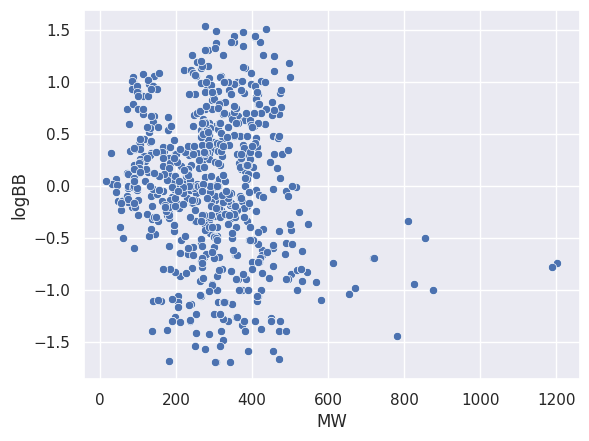

In [105]:
sns.scatterplot(data=df, x='MW', y='logBB') #зависимости logBB от массы молекулы нет

<Axes: xlabel='#ValenceElectrons', ylabel='Count'>

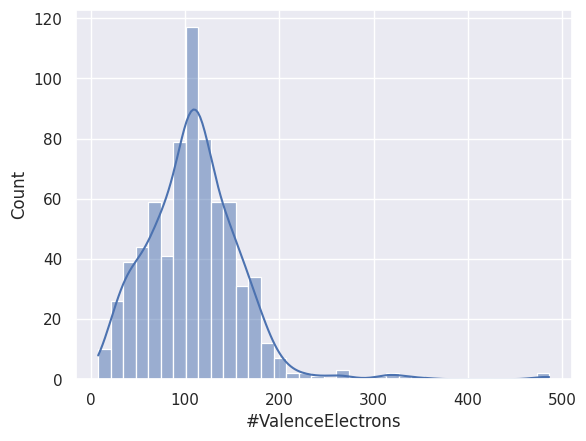

In [106]:
sns.histplot(df['#ValenceElectrons'], kde=True) #по числу валентных электронов в молекуле данные распределены нормально

In [107]:
corr_matrix = df.corr()
col_index_to_del = []

<ipython-input-107-66b2a69e0330>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


In [108]:
for i in range(1, corr_matrix.shape[0]):
    for j in range(1, i):
        if abs(round(corr_matrix.iloc[i][j], 2)) >= 0.9:
              if corr_matrix.iloc[i][0] >= corr_matrix.iloc[j][0]:
                col_index_to_del.append(j)
              else:
                col_index_to_del.append(i)

In [109]:
col_index_to_del = list(set(col_index_to_del))

In [110]:
len(col_index_to_del)

13

In [111]:
col_index_to_del = [i + 1 for i in col_index_to_del]

In [112]:
df.drop(df.columns[col_index_to_del], axis=1, inplace=True)
df.head()

,logBB,SMILES_uncharge,#HBA,#ROTB,#ALERTS,MlogP,#MR,#NHOH,#AromaticCarbocycles,#AromaticHeterocycles,#Heteroatoms,Morgan2,Morgan3,MaxPartialCharge,MinPartialCharge,BalabanJ,Ipc,HallKierAlpha,Kappa3
0,-0.67,CC1=C(CCN2CCC(C3=NOC4=CC(F)=CC=C34)CC2)C(=O)N2...,6.0,4.0,0.0,3.08,113.51,1.0,1.0,2.0,8.0,2.03,2.84,0.26,-0.39,1.24,18087426.53,-2.58,3.78
1,0.82,CC1=CC=CC2=C1OC1=CC=CC=C1C1(O)CCN(C)CC21,3.0,0.0,0.0,3.41,86.45,1.0,2.0,0.0,3.0,2.00,2.86,0.13,-0.46,2.00,152461.48,-1.84,1.89
2,-0.04,NC(=O)N1C2=CC=CC=C2C=CC2=CC=CC=C21,1.0,0.0,0.0,3.39,73.53,2.0,2.0,0.0,3.0,1.28,1.72,0.32,-0.35,2.31,20630.43,-2.55,1.57
3,-0.84,O=C1NC2=CC=CC=C2N1CCCN1CCC(N2C(=O)NC3=CC(Cl)=C...,3.0,5.0,0.0,3.35,119.46,2.0,2.0,2.0,8.0,1.67,2.50,0.33,-0.31,1.21,12343200.70,-2.77,3.48
4,0.99,CN1CCN2C3=CC=CC=C3CC3=CC=CC=C3C2C1,2.0,0.0,0.0,3.08,83.27,0.0,2.0,0.0,2.0,1.65,2.55,0.07,-0.36,1.90,76322.13,-1.80,1.83


In [113]:
df.to_csv("processed_dataset.csv")